# Performing simple data frame transformations which can be used in the final project notebook

## Just Starting

In [1]:
import pandas as pd

FILE_PATH = '../data/winemag-data_first150k.csv'
raw_data = pd.read_csv(FILE_PATH, index_col=0)

# I'm going to use only 2 columns to perform our task. Our predictor variable is going to be "description" and target variable is "variety"
# We want to simulate the situation where there are only a text field and target value field provided.

df = raw_data[['description', 'variety']]


In [2]:
# simple inital data analysis
print('shape', df.shape)
print('----------------\n')
print('null values:')
print(df.isna().sum())

shape (150930, 2)
----------------

null values:
description    0
variety        0
dtype: int64


In [3]:
# checking out for duplicated descriptions

desc_duplicates = df[df.duplicated(subset=['description'], keep=False)]

# just to check what kind of duplicated valeus we have
desc_duplicates = desc_duplicates.sort_values(by='description')

desc_duplicates.head(30)


,description,variety
147725,$11. Opens with a highly perfumed bouquet of l...,Chardonnay
62345,$11. Opens with a highly perfumed bouquet of l...,Chardonnay
74993,). Very good wine from a winery increasingly k...,Cabernet Sauvignon
18803,). Very good wine from a winery increasingly k...,Cabernet Sauvignon
26530,". Christoph Neumeister's top wine, this is a c...",Sauvignon Blanc
84730,". Christoph Neumeister's top wine, this is a c...",Sauvignon Blanc
53110,". Christoph Neumeister's top wine, this is a c...",Sauvignon Blanc
107351,. From a small south-facing parcel next to the...,Chenin Blanc
65231,. From a small south-facing parcel next to the...,Chenin Blanc
43074,. Lemon zest and exotic spices enliven the nos...,Riesling


In [4]:
# dropping duplicates
df = df.drop_duplicates(subset=['description'], keep='last')
df

,description,variety
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,"This is the top wine from La Bégude, named aft...",Provence red blend
...,...,...
150925,Many people feel Fiano represents southern Ita...,White Blend
150926,"Offers an intriguing nose with ginger, lime an...",Champagne Blend
150927,This classic example comes from a cru vineyard...,White Blend
150928,"A perfect salmon shade, with scents of peaches...",Champagne Blend


In [5]:
# finding top 15 varieties
%time
top_fifteen_varieties = df['variety'].value_counts().head(15).to_frame()
top_fifteen_varieties

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


,variety
Pinot Noir,9283
Chardonnay,9159
Cabernet Sauvignon,8267
Red Blend,6484
Bordeaux-style Red Blend,5170
Sauvignon Blanc,4034
Syrah,3662
Riesling,3582
Merlot,3176
Zinfandel,2408


In [6]:
# finding top 15 the other way - with "groupby"
%time
top_15 = df.groupby('variety').nunique().sort_values('description', ascending=False).head(15)
top_15

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


,description,variety
variety,,
Pinot Noir,9283,1
Chardonnay,9159,1
Cabernet Sauvignon,8267,1
Red Blend,6484,1
Bordeaux-style Red Blend,5170,1
Sauvignon Blanc,4034,1
Syrah,3662,1
Riesling,3582,1
Merlot,3176,1


In [7]:
# a series of the top 15 varieties
top_fifteen_varieties = top_fifteen_varieties.index

In [8]:
top_fifteen_varieties = top_fifteen_varieties.to_list()

In [9]:
# creating a Dataframe with the top 15 varieties only
only_top_15_varieties = df.loc[df['variety'].isin(top_fifteen_varieties)]
raw_data_cleaned = only_top_15_varieties.reset_index().drop(columns='index')
raw_data_cleaned

,description,variety
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
2,"This spent 20 months in 30% new French oak, an...",Pinot Noir
3,This re-named vineyard was formerly bottled as...,Pinot Noir
4,The producer sources from two blocks of the vi...,Pinot Noir
...,...,...
64728,"This needs a good bit of breathing time, then ...",Pinot Noir
64729,The nose is dominated by the attractive scents...,Pinot Noir
64730,"Decades ago, Beringer’s then-winemaker Myron N...",White Blend
64731,Many people feel Fiano represents southern Ita...,White Blend


## Factorizing

In [10]:
from io import StringIO
col = ['variety', 'description']
df = raw_data_cleaned[col]
df = df[pd.notnull(df['description'])]
df.columns = ['variety', 'description']

# assigning category to wine variety
df['category_id'] = df['variety'].factorize()[0]
category_id_df = df[['variety', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'variety']].values)
raw_data_cleaned = df
raw_data_cleaned.head()

,variety,description,category_id
0,Cabernet Sauvignon,This tremendous 100% varietal wine hails from ...,0
1,Sauvignon Blanc,Mac Watson honors the memory of a wine once ma...,1
2,Pinot Noir,"This spent 20 months in 30% new French oak, an...",2
3,Pinot Noir,This re-named vineyard was formerly bottled as...,2
4,Pinot Noir,The producer sources from two blocks of the vi...,2


In [11]:
# # pickling to use it later
# PICKLE_PATH = '../data/pickles/raw_data_cleaned.pkl'
# raw_data_cleaned.to_pickle(PICKLE_PATH)

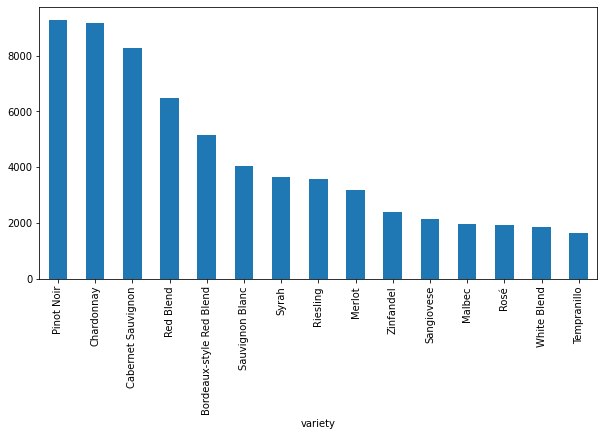

In [12]:
# imbalanced classes
# in the table above, we can see that the dataset is heavily imbalanced, lets' plot it

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
raw_data_cleaned.groupby('variety').description.count().sort_values(ascending=False).plot.bar(ylim=0)
plt.show()

## TfidfVectorizer

In [14]:
# Text representation


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True,
                        min_df=5,
                        norm='l2',
                        encoding='latin-1',
                        ngram_range=(1,1),
                        stop_words='english')

features = tfidf.fit_transform(raw_data_cleaned['description']).toarray()
labels = raw_data_cleaned['variety']

features.shape


(64733, 9244)

In [18]:
df2 = pd.DataFrame(features, columns=tfidf.get_feature_names())
df2

,000,01,02,03,04,05,06,07,08,09,...,zingy,zinny,zins,zip,zippy,zips,zone,zonin,zweigelt,émilion
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# # We can use sklearn.feature_selection.chi2 to find the terms that are the most 
# # correlated with each of the variety

# from sklearn.feature_selection import chi2
# import numpy as np

# N=2
# for variety, category_id in sorted(category_to_id.items()):
#     features_chi2 = chi2(features, labels == category_id)
#     indices = np.argsort(features_chi2[0])
#     feature_names = np.array(tfidf.get_feature_names())[indices]
#     unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#     bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#     print("# '{}':".format(variety))
#     print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#     print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bordeaux-style Red Blend':
  . Most correlated unigrams:
. finshes
. émilion
  . Most correlated bigrams:
. 
# 'Cabernet Sauvignon':
  . Most correlated unigrams:
. finshes
. émilion
  . Most correlated bigrams:
. 
# 'Chardonnay':
  . Most correlated unigrams:
. finshes
. émilion
  . Most correlated bigrams:
. 


KeyboardInterrupt: 

In [ ]:
# # creating a base line. How would the model predict the verieties without changing anything with description
# # (just wondering)

# # TODO: THE DATASET NEEDS TO BE PREPARED FIRST. THE ALGORITHMS CAN'T HANDLE TEXT DATA

# X, y = raw_data_cleaned['description'], raw_data_cleaned['variety']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1]:
# let's try for the most popular classifiers


## Word Cloud

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS

In [4]:
data = pd.read_pickle('../data/pickles/01_prepared_dataset.pkl')

In [5]:
data.head()

,description,variety
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
2,"This spent 20 months in 30% new French oak, an...",Pinot Noir
3,This re-named vineyard was formerly bottled as...,Pinot Noir
4,The producer sources from two blocks of the vi...,Pinot Noir


(-0.5, 999.5, 799.5, -0.5)

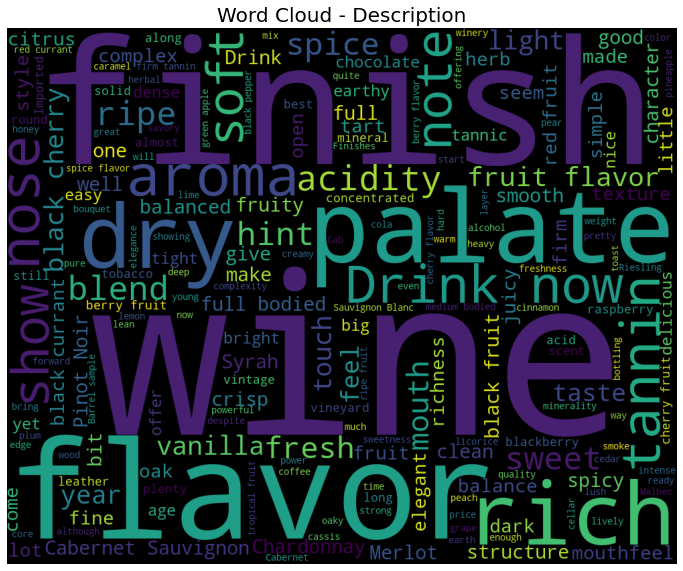

In [53]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    stopwords=stopwords,
    width=1000, height=800,
    random_state=42
).generate(' '.join(data['description']))

print(wordcloud)
fig = plt.figure(figsize=(12,14))
plt.imshow(wordcloud)
plt.title('Word Cloud - Description', fontsize=20)
plt.axis('off')

In [47]:
# check what and how many words are there
bag_of_words = []
for desc in data.description:
    cleaned_desc = map(str.lower, re.sub('[.,"“]', '', desc).split(' '))
    for word in cleaned_desc:
        if word not in stopwords:
            bag_of_words.append(word)
            
df = pd.DataFrame(bag_of_words, columns=['Words'])
df['Counter'] = 1
df.groupby('Words').sum().sort_values(['Counter'], ascending=False).head(30)

,Counter
Words,
flavors,35462
wine,35381
fruit,23638
finish,16278
tannins,15191
cherry,14369
acidity,13814
aromas,13595
palate,12315


(-0.5, 999.5, 799.5, -0.5)

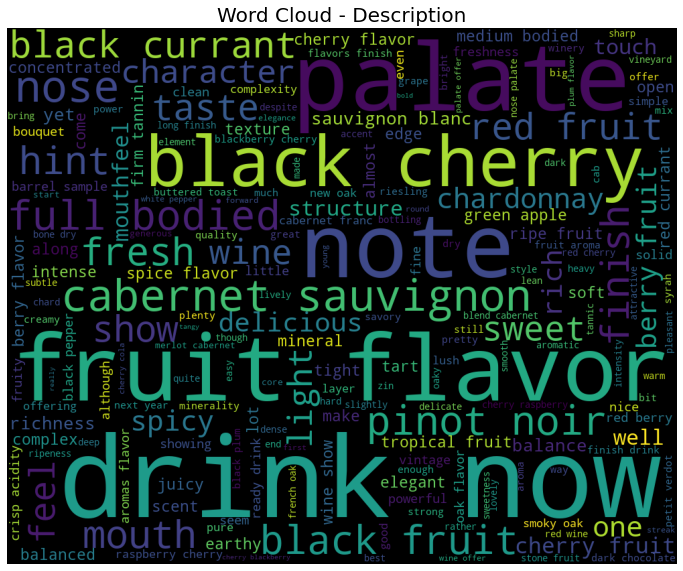

In [54]:
wordcloud_2 = WordCloud(
    stopwords=stopwords,
    width=1000, height=800,
    random_state=42
).generate(' '.join(df['Words']))

print(wordcloud_2)
fig = plt.figure(figsize=(12,14))
plt.imshow(wordcloud_2)
plt.title('Word Cloud - Description', fontsize=20)
plt.axis('off')

## Tokenizing

In [20]:
# let's try something else, that is NLTK.
from nltk import word_tokenize, wordpunct_tokenize
from nltk.tokenize import TweetTokenizer, RegexpTokenizer

In [41]:
first_record = data.description[0]
# first_record = data.description[2]
# first_record = data.description[24]
# first_record = data.description[42]
# first_record = data.description[1000]




word_tokens = word_tokenize(first_record)
wordpunct_tokens = wordpunct_tokenize(first_record)
tweet_tokens = TweetTokenizer().tokenize(first_record)

re_tokenizer = RegexpTokenizer('\d+%|\w+')
regexp_tokens = re_tokenizer.tokenize(first_record)

print('--- SENTENCE ---')
print(first_record)
print('--- WORD TOKENS ---')
print(word_tokens)
print('--- WORDPUNCT TOKENS ---')
print(wordpunct_tokens)
print('--- TWEET TOKENIZER ---')
print(tweet_tokens)
print('--- REGEXP TOKENIZER ---')
print(regexp_tokens)

--- SENTENCE ---
This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.
--- WORD TOKENS ---
['This', 'tremendous', '100', '%', 'varietal', 'wine', 'hails', 'from', 'Oakville', 'and', 'was', 'aged', 'over', 'three', 'years', 'in', 'oak', '.', 'Juicy', 'red-cherry', 'fruit', 'and', 'a', 'compelling', 'hint', 'of', 'caramel', 'greet', 'the', 'palate', ',', 'framed', 'by', 'elegant', ',', 'fine', 'tannins', 'and', 'a', 'subtle', 'minty', 'tone', 'in', 'the', 'background', '.', 'Balanced', 'and', 'rewarding', 'from', 'start', 'to', 'finish', ',', 'it', 'has', 'years', 'ahead', 'of', 'it', 'to', 'develop', 'further', 'nuance', '.', 'Enjoy', '2022–2030', '.']
--- WORDPUNCT TOKENS ---
['This', 'tre

In [35]:
# Seems the regexp works best

## Stemming VS. Lemmatization

In [51]:
# let's check the difference between the stemming and lemmatization
# a few stemmers from bootcamp

from nltk.stem.snowball import EnglishStemmer, PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

english_stems = EnglishStemmer()
porter_stems = PorterStemmer()
lanc_stems = LancasterStemmer()
lemmetizer = WordNetLemmatizer()


print('--- TOKENIZED TEXT ---')
print(regexp_tokens)
print('--- ENGLISH STEMMER ---')
print([english_stems.stem(word) for word in regexp_tokens])
print('--- PORTER STEMMER ---')
print([porter_stems.stem(word) for word in regexp_tokens])
print('--- LANCASTER STEMMER ---')
print([lanc_stems.stem(word) for word in regexp_tokens])
print('--- LEMMATIZER ---')
print([lemmetizer.lemmatize(word) for word in regexp_tokens])

print('--- JUST DOUBLE CHECK HOW IT WORKS ON NOT TOKENIZED TEXT ---')
print(english_stems.stem(first_record))



--- TOKENIZED TEXT ---
['This', 'tremendous', '100%', 'varietal', 'wine', 'hails', 'from', 'Oakville', 'and', 'was', 'aged', 'over', 'three', 'years', 'in', 'oak', 'Juicy', 'red', 'cherry', 'fruit', 'and', 'a', 'compelling', 'hint', 'of', 'caramel', 'greet', 'the', 'palate', 'framed', 'by', 'elegant', 'fine', 'tannins', 'and', 'a', 'subtle', 'minty', 'tone', 'in', 'the', 'background', 'Balanced', 'and', 'rewarding', 'from', 'start', 'to', 'finish', 'it', 'has', 'years', 'ahead', 'of', 'it', 'to', 'develop', 'further', 'nuance', 'Enjoy', '2022', '2030']
--- ENGLISH STEMMER ---
['this', 'tremend', '100%', 'variet', 'wine', 'hail', 'from', 'oakvill', 'and', 'was', 'age', 'over', 'three', 'year', 'in', 'oak', 'juici', 'red', 'cherri', 'fruit', 'and', 'a', 'compel', 'hint', 'of', 'caramel', 'greet', 'the', 'palat', 'frame', 'by', 'eleg', 'fine', 'tannin', 'and', 'a', 'subtl', 'minti', 'tone', 'in', 'the', 'background', 'balanc', 'and', 'reward', 'from', 'start', 'to', 'finish', 'it', 'has',

## Functions to normalize text

In [136]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import EnglishStemmer, PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

def tokenize_text(text):
    tokenizer = RegexpTokenizer('\d+%|\w+')
    token_list = list(map(str.lower, tokenizer.tokenize(text)))
    return token_list
    
def stem_tokens(token_list):
    stemmer = EnglishStemmer()
    res = " ".join([stemmer.stem(token) for token in token_list])
    return res

    

    
    

In [137]:
data_sample = data[:20]

In [138]:
data_sample['description_cleaned_1'] = data_sample['description'].apply(tokenize_text)

<ipython-input-138-9ab845a91c2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['description_cleaned_1'] = data_sample['description'].apply(tokenize_text)


In [139]:
data_sample

,description,variety,cleaned_description,description_cleaned_1
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon,"[tremend, 100%, variet, wine, hail, oakvill, a...","[this, tremendous, 100%, varietal, wine, hails..."
1,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc,"[mac, watson, honor, memori, wine, made, mothe...","[mac, watson, honors, the, memory, of, a, wine..."
2,"This spent 20 months in 30% new French oak, an...",Pinot Noir,"[spent, 20, month, 30%, new, french, oak, inco...","[this, spent, 20, months, in, 30%, new, french..."
3,This re-named vineyard was formerly bottled as...,Pinot Noir,"[name, vineyard, former, bottl, delancellotti,...","[this, re, named, vineyard, was, formerly, bot..."
4,The producer sources from two blocks of the vi...,Pinot Noir,"[produc, sourc, two, block, vineyard, wine, on...","[the, producer, sources, from, two, blocks, of..."
5,"From 18-year-old vines, this supple well-balan...",Pinot Noir,"[18, year, old, vine, suppl, well, balanc, eff...","[from, 18, year, old, vines, this, supple, wel..."
6,A standout even in this terrific lineup of 201...,Pinot Noir,"[standout, even, terrif, lineup, 2015, releas,...","[a, standout, even, in, this, terrific, lineup..."
7,"With its sophisticated mix of mineral, acid an...",Pinot Noir,"[sophist, mix, miner, acid, tart, fruit, seduc...","[with, its, sophisticated, mix, of, mineral, a..."
8,"First made in 2006, this succulent luscious Ch...",Chardonnay,"[first, made, 2006, succul, luscious, chardonn...","[first, made, in, 2006, this, succulent, lusci..."
9,"This blockbuster, powerhouse of a wine suggest...",Cabernet Sauvignon,"[blockbust, powerhous, wine, suggest, blueberr...","[this, blockbuster, powerhouse, of, a, wine, s..."


## A function to remove stop words

In [140]:
from nltk.corpus import stopwords
import string

def remove_stopwords(token_list):
    STOPWORDS = stopwords.words('english') + list(string.punctuation) + ['--', '."', 'would', 'since', '!"', '?"', ',"', '...', '..', 'u', "'s", '....', "n't", "'m"]
    content = [token for token in token_list if token not in STOPWORDS]
    return content



In [141]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [142]:
data_sample['no_stopwords'] = data_sample['description_cleaned_1'].apply(remove_stopwords)

<ipython-input-142-ee23dd52e13c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['no_stopwords'] = data_sample['description_cleaned_1'].apply(remove_stopwords)


In [143]:
data_sample[['description_cleaned_1', 'no_stopwords']]

,description_cleaned_1,no_stopwords
0,"[this, tremendous, 100%, varietal, wine, hails...","[tremendous, 100%, varietal, wine, hails, oakv..."
1,"[mac, watson, honors, the, memory, of, a, wine...","[mac, watson, honors, memory, wine, made, moth..."
2,"[this, spent, 20, months, in, 30%, new, french...","[spent, 20, months, 30%, new, french, oak, inc..."
3,"[this, re, named, vineyard, was, formerly, bot...","[named, vineyard, formerly, bottled, delancell..."
4,"[the, producer, sources, from, two, blocks, of...","[producer, sources, two, blocks, vineyard, win..."
5,"[from, 18, year, old, vines, this, supple, wel...","[18, year, old, vines, supple, well, balanced,..."
6,"[a, standout, even, in, this, terrific, lineup...","[standout, even, terrific, lineup, 2015, relea..."
7,"[with, its, sophisticated, mix, of, mineral, a...","[sophisticated, mix, mineral, acid, tart, frui..."
8,"[first, made, in, 2006, this, succulent, lusci...","[first, made, 2006, succulent, luscious, chard..."
9,"[this, blockbuster, powerhouse, of, a, wine, s...","[blockbuster, powerhouse, wine, suggests, blue..."


In [144]:
data_sample['stemmed_words'] = data_sample['no_stopwords'].apply(stem_tokens)

<ipython-input-144-cc5f854af88b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['stemmed_words'] = data_sample['no_stopwords'].apply(stem_tokens)


In [107]:
data_sample[['description', 'description_cleaned_1', 'no_stopwords', 'stemmed_words']]

,description,description_cleaned_1,no_stopwords,stemmed_words
0,This tremendous 100% varietal wine hails from ...,"[this, tremendous, 100%, varietal, wine, hails...","[tremendous, 100%, varietal, wine, hails, oakv...","[tremend, 100%, variet, wine, hail, oakvill, a..."
1,Mac Watson honors the memory of a wine once ma...,"[mac, watson, honors, the, memory, of, a, wine...","[mac, watson, honors, memory, wine, made, moth...","[mac, watson, honor, memori, wine, made, mothe..."
2,"This spent 20 months in 30% new French oak, an...","[this, spent, 20, months, in, 30%, new, french...","[spent, 20, months, 30%, new, french, oak, inc...","[spent, 20, month, 30%, new, french, oak, inco..."
3,This re-named vineyard was formerly bottled as...,"[this, re, named, vineyard, was, formerly, bot...","[named, vineyard, formerly, bottled, delancell...","[name, vineyard, former, bottl, delancellotti,..."
4,The producer sources from two blocks of the vi...,"[the, producer, sources, from, two, blocks, of...","[producer, sources, two, blocks, vineyard, win...","[produc, sourc, two, block, vineyard, wine, on..."
5,"From 18-year-old vines, this supple well-balan...","[from, 18, year, old, vines, this, supple, wel...","[18, year, old, vines, supple, well, balanced,...","[18, year, old, vine, suppl, well, balanc, eff..."
6,A standout even in this terrific lineup of 201...,"[a, standout, even, in, this, terrific, lineup...","[standout, even, terrific, lineup, 2015, relea...","[standout, even, terrif, lineup, 2015, releas,..."
7,"With its sophisticated mix of mineral, acid an...","[with, its, sophisticated, mix, of, mineral, a...","[sophisticated, mix, mineral, acid, tart, frui...","[sophist, mix, miner, acid, tart, fruit, seduc..."
8,"First made in 2006, this succulent luscious Ch...","[first, made, in, 2006, this, succulent, lusci...","[first, made, 2006, succulent, luscious, chard...","[first, made, 2006, succul, luscious, chardonn..."
9,"This blockbuster, powerhouse of a wine suggest...","[this, blockbuster, powerhouse, of, a, wine, s...","[blockbuster, powerhouse, wine, suggests, blue...","[blockbust, powerhous, wine, suggest, blueberr..."


In [145]:
data['cleaned_description'] = data['description'].apply(tokenize_text).apply(remove_stopwords).apply(stem_tokens)

In [146]:
data

,description,variety,cleaned_description
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon,tremend 100% variet wine hail oakvill age thre...
1,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc,mac watson honor memori wine made mother treme...
2,"This spent 20 months in 30% new French oak, an...",Pinot Noir,spent 20 month 30% new french oak incorpor fru...
3,This re-named vineyard was formerly bottled as...,Pinot Noir,name vineyard former bottl delancellotti find ...
4,The producer sources from two blocks of the vi...,Pinot Noir,produc sourc two block vineyard wine one high ...
...,...,...,...
64728,"This needs a good bit of breathing time, then ...",Pinot Noir,need good bit breath time begin reveal cherri ...
64729,The nose is dominated by the attractive scents...,Pinot Noir,nose domin attract scent new french oak hint p...
64730,"Decades ago, Beringer’s then-winemaker Myron N...",White Blend,decad ago bering winemak myron nightingal crea...
64731,Many people feel Fiano represents southern Ita...,White Blend,mani peopl feel fiano repres southern itali pr...


## Frequency Distribution

In [147]:
# I want to try the FreqDist from nltk to show the most common words in our cleaned dataset

from nltk.probability import FreqDist

all_token_lists = []
for token_list in data.cleaned_description:
    all_token_lists.extend(token_list)



In [148]:
fdist_cleaned_description = FreqDist(all_token_lists)

In [149]:
print(fdist_cleaned_description)

<FreqDist with 72 samples and 10054761 outcomes>


In [150]:
fdist_cleaned_description.most_common()

[(' ', 1558480),
 ('e', 846112),
 ('i', 779456),
 ('r', 775616),
 ('a', 706252),
 ('t', 594722),
 ('n', 531240),
 ('o', 529918),
 ('l', 494465),
 ('s', 416736),
 ('c', 398234),
 ('h', 270021),
 ('p', 266427),
 ('u', 261966),
 ('d', 245093),
 ('f', 225370),
 ('m', 218799),
 ('b', 194173),
 ('g', 166950),
 ('w', 134406),
 ('v', 121790),
 ('k', 113189),
 ('y', 58394),
 ('x', 28826),
 ('0', 22604),
 ('2', 15388),
 ('j', 12621),
 ('1', 11751),
 ('q', 9255),
 ('z', 8744),
 ('%', 7791),
 ('5', 5284),
 ('9', 3834),
 ('3', 3562),
 ('8', 3483),
 ('4', 3168),
 ('6', 2873),
 ('7', 2652),
 ('é', 2596),
 ('è', 860),
 ('ô', 359),
 ('â', 276),
 ('û', 214),
 ('ü', 163),
 ('ñ', 156),
 ('ä', 125),
 ('ç', 61),
 ('í', 50),
 ('ö', 34),
 ('ó', 29),
 ('ê', 24),
 ('à', 24),
 ('á', 19),
 ('ì', 16),
 ('ù', 15),
 ('î', 12),
 ('½', 11),
 ('ò', 11),
 ('ï', 11),
 ('ã', 10),
 ('ú', 10),
 ('õ', 10),
 ('ë', 8),
 ('æ', 3),
 ('_', 2),
 ('š', 1),
 ('²', 1),
 ('º', 1),
 ('ÿ', 1),
 ('ß', 1),
 ('ª', 1),
 ('ž', 1)]

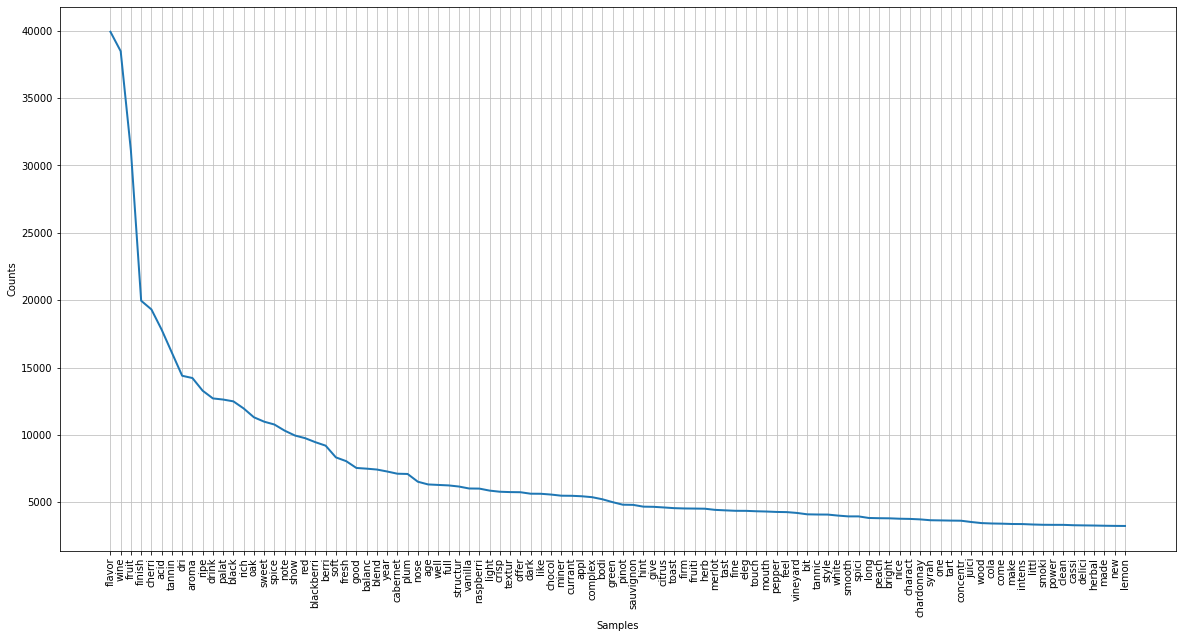

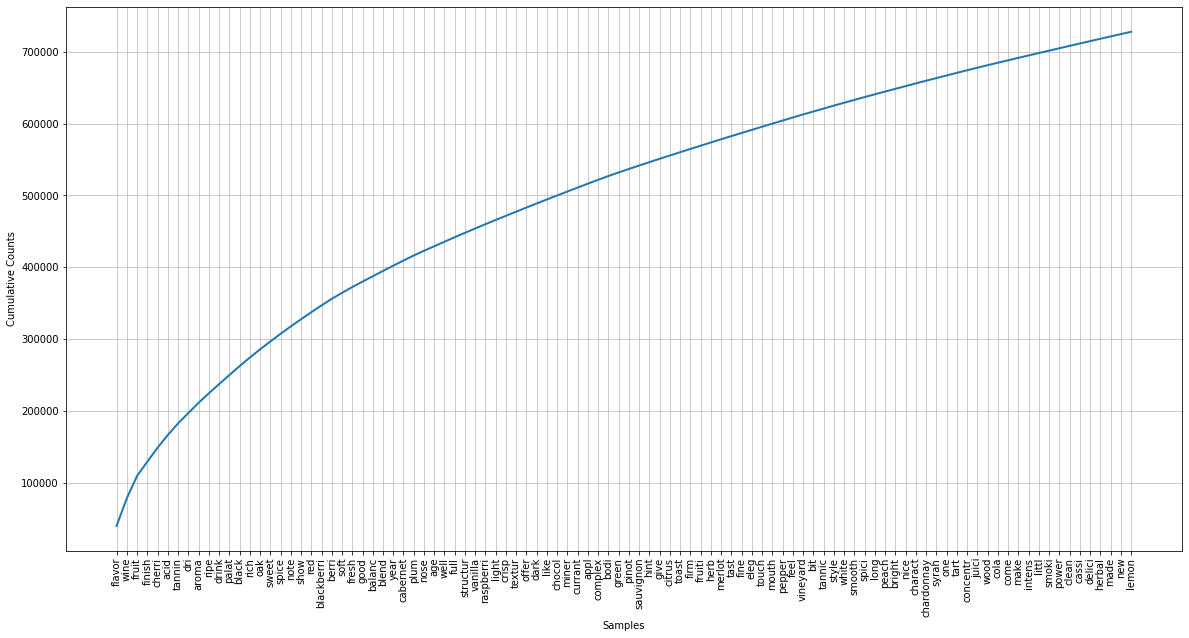

In [135]:
# from matplotlib.pyplot import figure
figure(figsize=(20,10))

fdist_cleaned_description.plot(100, cumulative=False)

figure(figsize=(20,10))
fdist_cleaned_description.plot(100, cumulative=True)





## Topic modeling and creating vectorizer

Topic Modeling is the process of extracting the main topics from a collection of text data or documents. Essentially, it's a form of Dimensionality Reduction

In [161]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(min_df=5)
data_vectorized = vectorizer.fit_transform(data['cleaned_description'])

In [153]:
lda = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online', verbose=True)
data_lda = lda.fit_transform(data_vectorized)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [154]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}:")
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

In [155]:
selected_topics(lda, vectorizer)

Topic 0:
[('simpl', 2060.8924331816243), ('wine', 1637.0360273958702), ('light', 1223.420659235442), ('wrap', 1039.910866159736), ('color', 983.5138821837178), ('bone', 917.3752771457674), ('rosé', 892.1787381649285), ('red', 872.5138413233993), ('keep', 867.8033665905906), ('live', 807.7287299722149)]
Topic 1:
[('flavor', 9006.502265869267), ('acid', 5951.102314300716), ('appl', 5416.629295616413), ('finish', 5409.509142688253), ('citrus', 4752.9695420316075), ('wine', 4659.606945738295), ('fruit', 4182.362820191047), ('crisp', 4139.234125571399), ('peach', 3966.0307803085175), ('chardonnay', 3782.6110235207802)]
Topic 2:
[('wine', 16669.683028040607), ('fruit', 11975.524664156324), ('tannin', 6819.114766223424), ('acid', 5700.875543116643), ('year', 5388.421166795844), ('ripe', 5108.971798564723), ('age', 4841.67664102671), ('rich', 4809.624331894404), ('structur', 4421.3966210661865), ('flavor', 3686.5064789751236)]
Topic 3:
[('cabernet', 4858.73560764427), ('blend', 3309.1228505760

In [157]:
# Text representation


features_1 = data_vectorized.toarray()


In [158]:
count_vectorizer_bow = pd.DataFrame(features_1, columns=vectorizer.get_feature_names())
count_vectorizer_bow

,000,01,02,03,04,05,06,07,08,09,...,zinfandel,zing,zingi,zinni,zip,zippi,zone,zonin,zweigelt,émilion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
data

,description,variety,cleaned_description
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon,tremend 100% variet wine hail oakvill age thre...
1,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc,mac watson honor memori wine made mother treme...
2,"This spent 20 months in 30% new French oak, an...",Pinot Noir,spent 20 month 30% new french oak incorpor fru...
3,This re-named vineyard was formerly bottled as...,Pinot Noir,name vineyard former bottl delancellotti find ...
4,The producer sources from two blocks of the vi...,Pinot Noir,produc sourc two block vineyard wine one high ...
...,...,...,...
64728,"This needs a good bit of breathing time, then ...",Pinot Noir,need good bit breath time begin reveal cherri ...
64729,The nose is dominated by the attractive scents...,Pinot Noir,nose domin attract scent new french oak hint p...
64730,"Decades ago, Beringer’s then-winemaker Myron N...",White Blend,decad ago bering winemak myron nightingal crea...
64731,Many people feel Fiano represents southern Ita...,White Blend,mani peopl feel fiano repres southern itali pr...


In [160]:
pd.concat([data, count_vectorizer_bow], axis=1)

,description,variety,cleaned_description,000,01,02,03,04,05,06,...,zinfandel,zing,zingi,zinni,zip,zippi,zone,zonin,zweigelt,émilion
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon,tremend 100% variet wine hail oakvill age thre...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc,mac watson honor memori wine made mother treme...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"This spent 20 months in 30% new French oak, an...",Pinot Noir,spent 20 month 30% new french oak incorpor fru...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,This re-named vineyard was formerly bottled as...,Pinot Noir,name vineyard former bottl delancellotti find ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The producer sources from two blocks of the vi...,Pinot Noir,produc sourc two block vineyard wine one high ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64728,"This needs a good bit of breathing time, then ...",Pinot Noir,need good bit breath time begin reveal cherri ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64729,The nose is dominated by the attractive scents...,Pinot Noir,nose domin attract scent new french oak hint p...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64730,"Decades ago, Beringer’s then-winemaker Myron N...",White Blend,decad ago bering winemak myron nightingal crea...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64731,Many people feel Fiano represents southern Ita...,White Blend,mani peopl feel fiano repres southern itali pr...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
function for tuning hyperparams of classifiers

def tune_and_fit(clf, p_grid, cv = 5, X_train = X_train, y_train = y_train):   
    grid = GridSearchCV(clf, param_grid = p_grid, cv = cv, n_jobs = -1, verbose = True, 
                        scoring = make_scorer(f1_score, average='weighted'))
    grid.fit(X_train,y_train)
    print('Best parameters found: ')
    print(grid.best_params_)
    print('\n Best score:')
    print(grid.best_score_)
    
    return grid.best_estimator_